            temperature
date                   
2014-06-01         27.8
2014-06-01         26.1
2014-06-01         23.3
2014-06-01         22.8
2014-06-01         18.9


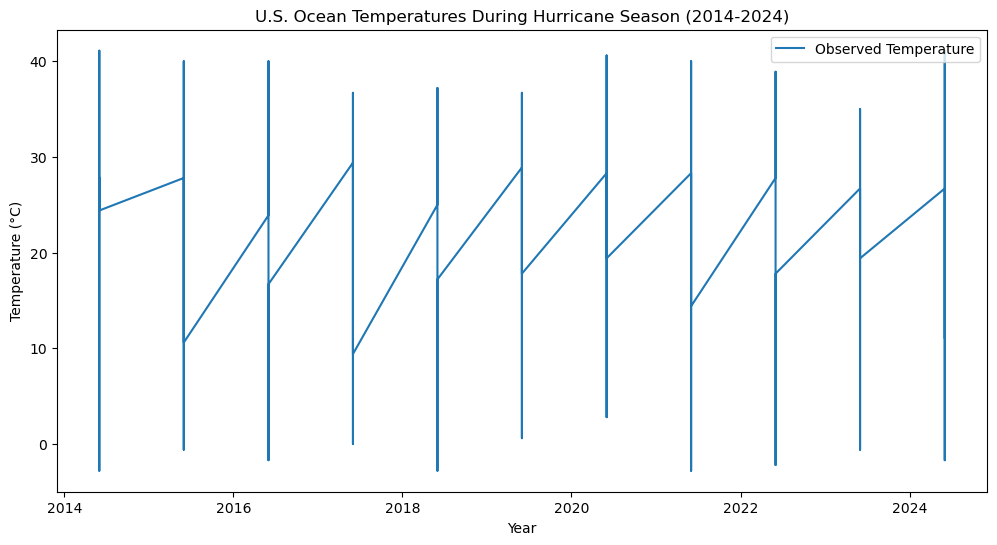

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define your token and headers
api_token = "RKvxexICPXTmHBocSlwoIJHHGExbjbwl"
headers = {
    "token": api_token
}

# Define base URL for the API request
base_url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"

# Storage for combined temperature data across all years
temperature_data = []

# Loop through each year
for year in range(2014, 2025):
    # Update start and end dates for each year
    startdate = f"{year}-06-01"
    enddate = f"{year}-11-30"  # Hurricane season from June to November

    # Set parameters for the API request
    params = {
        "datasetid": "GHCND",                # Replace if more accurate dataset ID is available
        "datatypeid": "TOBS",                # Temperature observations, replace if ocean-specific data exists
        "locationid": "FIPS:US",             # United States data
        "startdate": startdate,
        "enddate": enddate,
        "units": "metric",
        "limit": 1000                        # Maximum records per request
    }

    # Make API request
    response = requests.get(base_url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Parse entries to extract dates and temperatures
        for record in data.get("results", []):
            date = record.get("date")
            temperature = record.get("value")  # Adjust based on actual temperature field

            # Append valid data entries
            if date and temperature is not None:
                temperature_data.append({
                    "date": datetime.strptime(date, "%Y-%m-%dT%H:%M:%S"),
                    "temperature": temperature
                })
    else:
        print(f"Error for year {year}: {response.status_code}", response.text)

# Check if data was collected
if temperature_data:
    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(temperature_data)
    df.set_index("date", inplace=True)

    # Display the first few rows of data
    print(df.head())

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["temperature"], label="Observed Temperature")
    plt.title("U.S. Ocean Temperatures During Hurricane Season (2014-2024)")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.show()



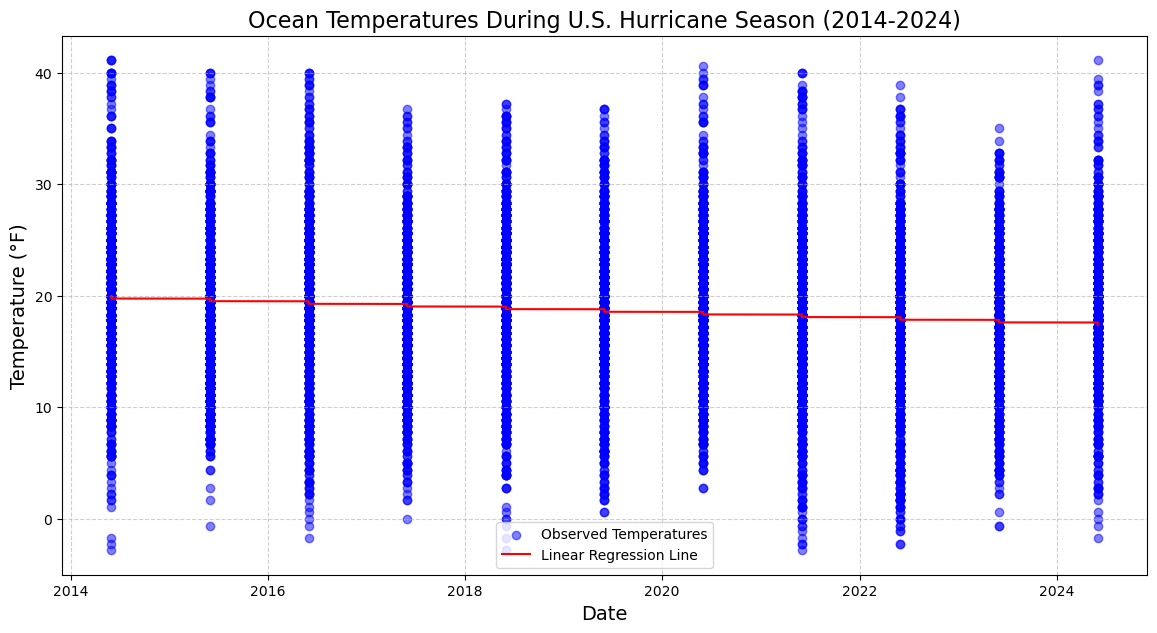

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Scatter plot and linear regression
plt.figure(figsize=(14, 7))

# Scatter plot of the data
plt.scatter(df.index, df["temperature"], color='blue', label="Observed Temperatures", alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(range(len(df.index)), df["temperature"])
plt.plot(df.index, slope * range(len(df.index)) + intercept, color='red', label="Linear Regression Line")

# Graph labels and title
plt.title("Ocean Temperatures During U.S. Hurricane Season (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°F)", fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Display the graph
plt.show()


            temperature
date                   
2014-06-01         27.8
2014-06-01         26.1
2014-06-01         23.3
2014-06-01         22.8
2014-06-01         18.9


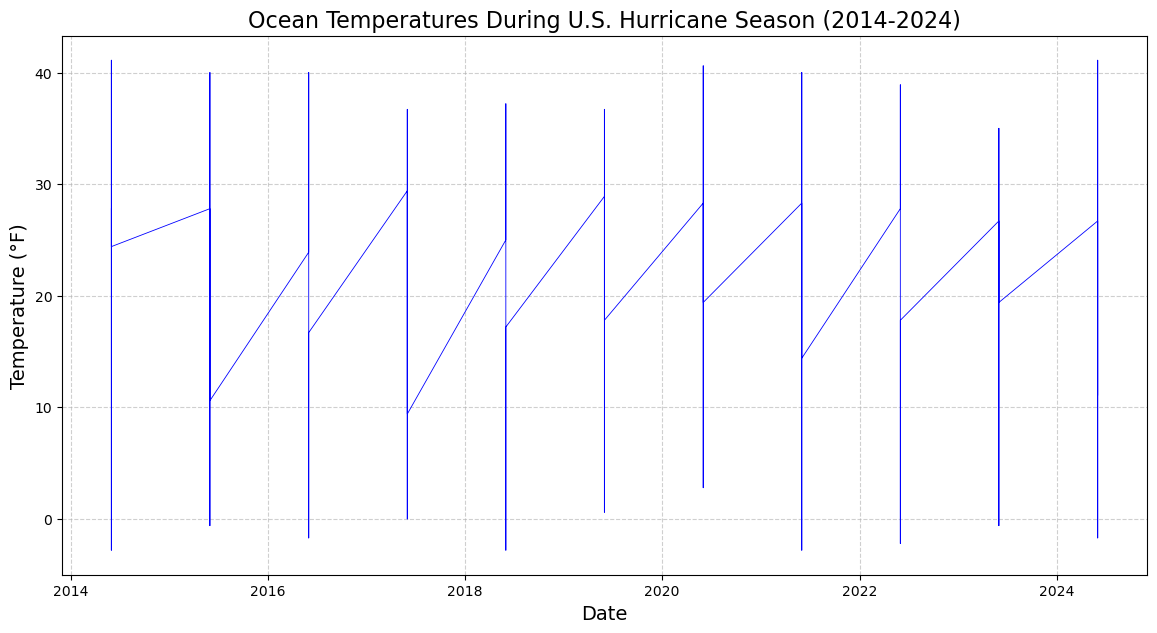

In [2]:
import matplotlib.pyplot as plt

# Example DataFrame with datetime index and temperature column
# Assuming `df` is structured with 'date' as index and 'temperature' as a column

# Check the DataFrame structure (first few rows)
print(df.head())

# Plotting the data
plt.figure(figsize=(14, 7))  # Larger figure for better visibility

plt.plot(df.index, df["temperature"], color='blue', linewidth=0.6)  # Line color and thickness

# Graph labels and title
plt.title("Ocean Temperatures During U.S. Hurricane Season (2014-2024)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°F)", fontsize=14)

# Adding a grid for readability
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Display the graph
plt.show()


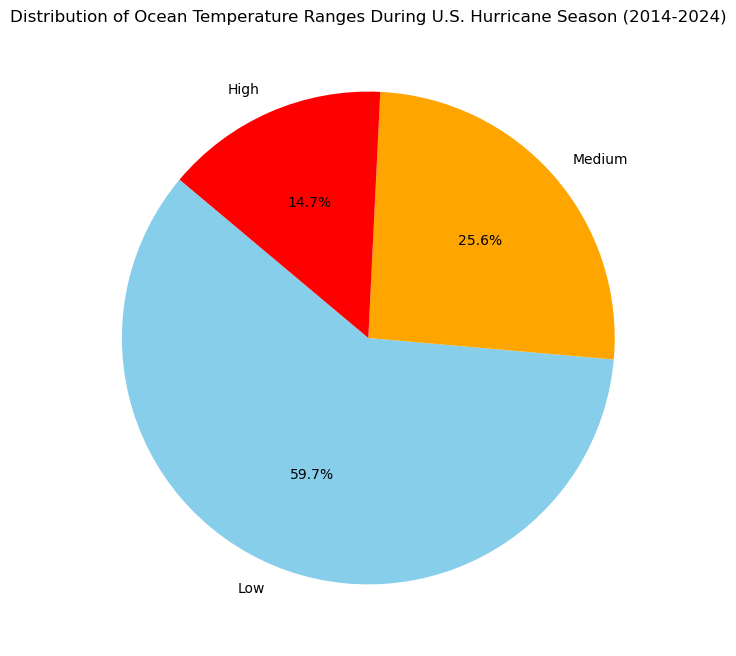

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` has 'temperature' column with temperature data
# Categorize temperatures
temperature_categories = pd.cut(df["temperature"], bins=[-float("inf"), 20, 25, float("inf")], labels=["Low", "Medium", "High"])
category_counts = temperature_categories.value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "orange", "red"])
plt.title("Distribution of Ocean Temperature Ranges During U.S. Hurricane Season (2014-2024)")
plt.show()


In [ ]:
Define categories:
Low: Below 20°C
Medium: 20–25°C
High: Above 25°C

In [4]:
# Group by year and calculate the average temperature for each year
df['year'] = df.index.year  # Ensure 'year' column is available
annual_avg_temp = df.groupby('year')['temperature'].mean()


In [5]:
# Calculate percentage change relative to the first year
baseline_temp = annual_avg_temp.iloc[0]  # Take the temperature of the first year as the baseline
yearly_change_percent = ((annual_avg_temp - baseline_temp) / baseline_temp) * 100  # Percent change


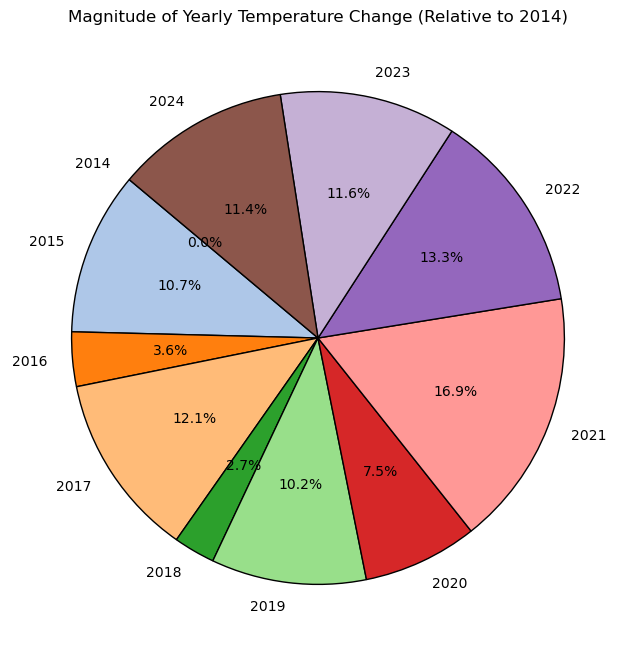

In [6]:
# Take the absolute values of the percentage change
yearly_change_percent = yearly_change_percent.abs()

# Plot the pie chart with absolute percentage changes
plt.figure(figsize=(8, 8))
plt.pie(yearly_change_percent, labels=yearly_change_percent.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.tab20(range(len(yearly_change_percent))), wedgeprops={'edgecolor': 'black'})
plt.title("Magnitude of Yearly Temperature Change (Relative to 2014)")
plt.show()



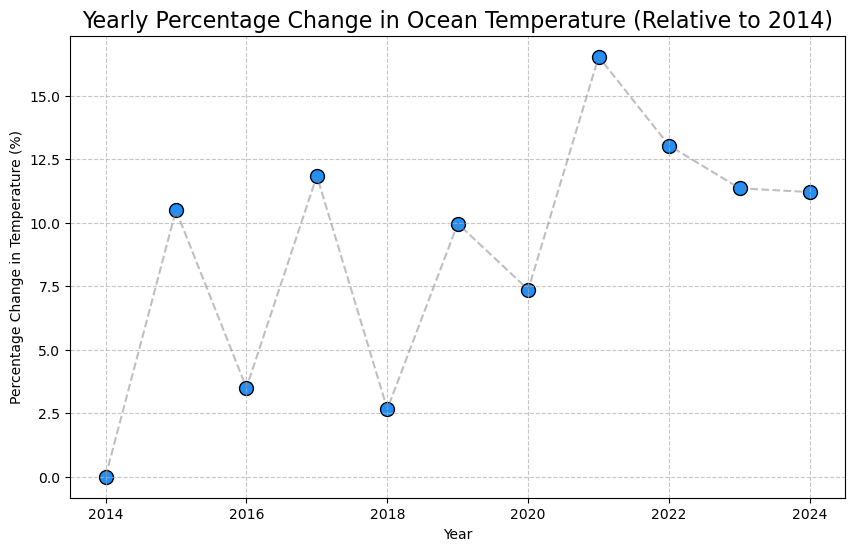

In [7]:
import matplotlib.pyplot as plt

# Plot scatter plot for percentage change in temperature by year
plt.figure(figsize=(10, 6))
plt.scatter(yearly_change_percent.index, yearly_change_percent, color="dodgerblue", edgecolor="black", s=100)
plt.plot(yearly_change_percent.index, yearly_change_percent, color="gray", linestyle="--", alpha=0.5)

# Add title and labels
plt.title("Yearly Percentage Change in Ocean Temperature (Relative to 2014)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percentage Change in Temperature (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


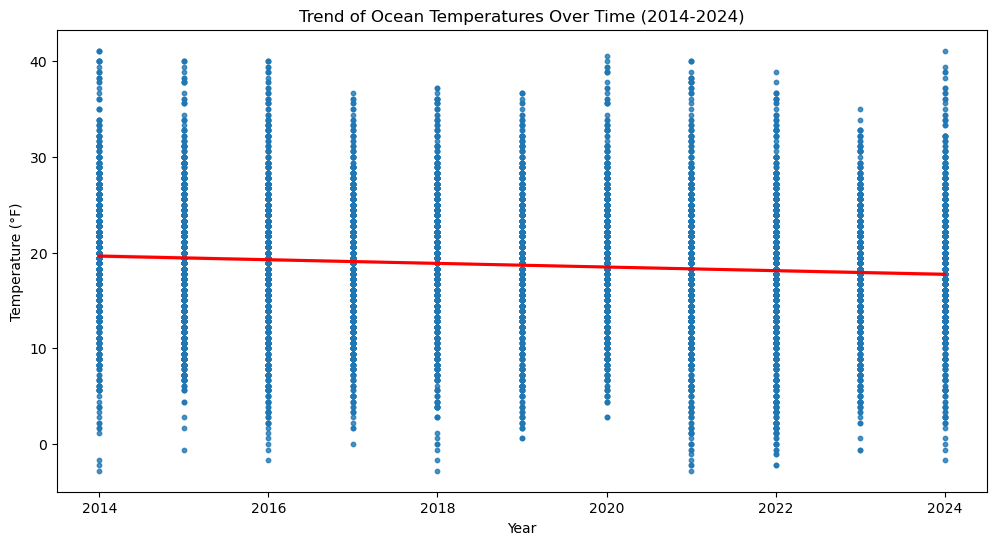

In [8]:
import seaborn as sns

# Convert 'date' to numerical format if needed for regression analysis
df["year"] = df.index.year

# Plotting linear regression
plt.figure(figsize=(12, 6))
sns.regplot(x="year", y="temperature", data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})

plt.title("Trend of Ocean Temperatures Over Time (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.show()


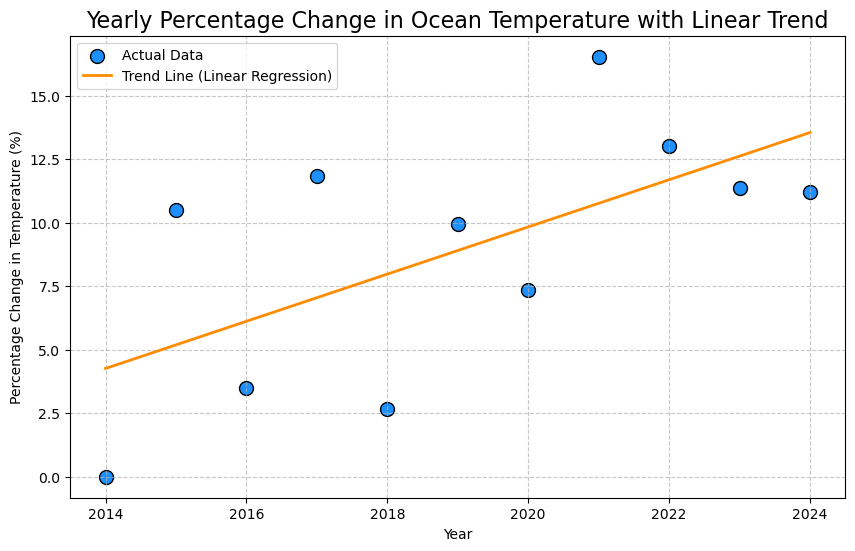

Slope of the trend line: 0.9290% change per year


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = yearly_change_percent.index.values.reshape(-1, 1)  # Year as predictor variable
y = yearly_change_percent.values  # Temperature percentage change as response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the line of best fit
y_pred = model.predict(X)

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="dodgerblue", edgecolor="black", s=100, label="Actual Data")
plt.plot(X, y_pred, color="darkorange", linewidth=2, label="Trend Line (Linear Regression)")

# Add title and labels
plt.title("Yearly Percentage Change in Ocean Temperature with Linear Trend", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percentage Change in Temperature (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Display the slope of the trend line for additional insight
print(f"Slope of the trend line: {model.coef_[0]:.4f}% change per year")
